In [14]:
import csv

t = [] # column 0
data1 = [] # column 1
data2 = [] # column 2

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigA.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        t.append(float(row[0])) # leftmost column
        data1.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

for i in range(10):
    # print the data to verify it was read
    print(str(t[i]) + ", " + str(data1[i]))

0.0, 2.3580832635385773
0.0001, 2.615750351752668
0.0002, 2.85571184573269
0.00030000000000000003, 2.8735256729254357
0.0004, 2.1195354857013906
0.0005, 1.9858658787163883
0.0006000000000000001, 3.441462113590727
0.0007, 2.283491051279485
0.0008, 2.552706319745801
0.0009000000000000001, 2.6207633414518177


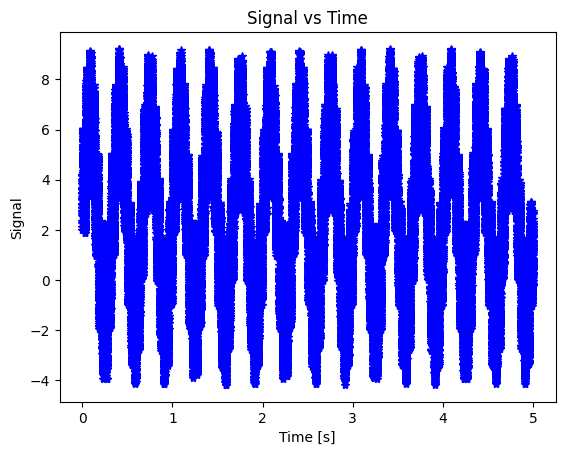

In [16]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for sine function

# dt = 1.0/100.0 # 100Hz
# t = np.arange(0.0, 5.0, dt) # for 5s

# s = 2.0 * np.sin(2 * np.pi * 2.3 * t) + 2.5 # 2.3Hz

plt.plot(t,data1,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal vs Time')
plt.show()

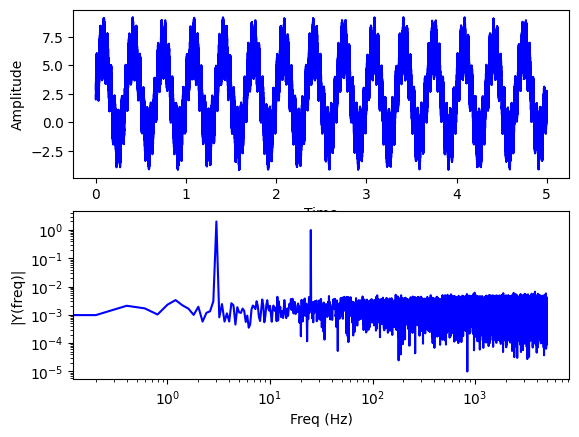

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# dt = 1.0/10000.0 # 10kHz
# t = np.arange(0.0, 1.0, dt) # 10s
# # a constant plus 100Hz and 1000Hz
# s = 4.0 * np.sin(2 * np.pi * 100 * t) + 0.25 * np.sin(2 * np.pi * 1000 * t) + 25

Fs = 10000 # sample rate
Ts = 1.0/Fs; # sampling interval
ts = np.arange(0,t[-1],Ts) # time vector
y = data1 # the data to make the fft from
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,y,'b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frq,abs(Y),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()